In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# 1. Populations.xlsx 파일을 읽어 DataFrame pops_df를 생성하시오.
pops_df = pd.read_excel("populations.xlsx")

In [10]:
# 2. 년도(Year) 컬럼을 index로 설정하시오.
pops_df = pops_df.set_index("년도")

In [11]:
# 3. 토끼, 시라소니, 당근에 대한 기본 통계량을 구하시오. (describe() 사용)
pops_df[["토끼", "시라소니", "당근"]].describe()

,토끼,시라소니,당근
count,21.000000,21.000000,21.000000
mean,34080.952381,20166.666667,42400.000000
std,21413.981859,16655.999920,3404.555771
min,7600.000000,4000.000000,36700.000000
25%,19500.000000,8600.000000,39800.000000
50%,25400.000000,12300.000000,41800.000000
75%,47200.000000,29700.000000,44500.000000
max,77400.000000,59400.000000,48300.000000


In [12]:
# 4. 토끼의 시라소니의 매년 개체수의 차(즉, 토끼개체수 – 시라소니개체수)를 “차이” 컬럼으로 추가하시오.
pops_df["차이"] = pops_df["토끼"] - pops_df["시라소니"]
pops_df.head()

,토끼,시라소니,당근,차이
년도,,,,
1900,30000,4000,48300,26000
1901,47200,6100,48200,41100
1902,70200,9800,41500,60400
1903,77400,35200,38200,42200
1904,36300,59400,40600,-23100


In [13]:
# 5. 각 개체의 년도별 증감율을 구하시오.
growth_rate = pops_df[["토끼", "시라소니", "당근"]].pct_change() * 100
growth_rate.head()

,토끼,시라소니,당근
년도,,,
1900,NaN,NaN,NaN
1901,57.333333,52.500000,-0.207039
1902,48.728814,60.655738,-13.900415
1903,10.256410,259.183673,-7.951807
1904,-53.100775,68.750000,6.282723


In [14]:
# 6. 토끼, 시라소니, 당근간의 상관계수를 구하시오.
pops_df[["토끼", "시라소니", "당근"]].corr()

,토끼,시라소니,당근
토끼,1.000000,0.071892,-0.016604
시라소니,0.071892,1.000000,-0.680577
당근,-0.016604,-0.680577,1.000000


In [16]:
# 7. 당근의 개체수가 표준편차보다 1.5배 이상 많은 개체수가 있는 해(year)와 그 때 개체수를 구하시오.
carrot_high_cut = pops_df["당근"].mean() + 1.5 * pops_df["당근"].std()
carrot_high = pops_df[pops_df["당근"] >= carrot_high_cut][["당근"]]
carrot_high

,당근
년도,
1900,48300
1901,48200


In [23]:
# 8. 각 개체의 개체수를 전체 기간 평균으로 나누어 mean_rate 컴럼을 추가한 후, 각 개체의 가장 높은 값을 가지는 해를 각각 구하시오.
mean_vals = pops_df[["토끼", "시라소니", "당근"]].mean()
for col in ["토끼", "시라소니", "당근"]:
    pops_df[col + "_mean_rate"] = pops_df[col] / mean_vals[col]
pops_df[["토끼_mean_rate", "시라소니_mean_rate", "당근_mean_rate"]].idxmax()

토끼_mean_rate      1903
시라소니_mean_rate    1904
당근_mean_rate      1900
dtype: int64

In [26]:
# 9. 5년 단위로 각 개체의 평균값을 계산하시오.
pops_df.index = pd.PeriodIndex(pops_df.index, freq="Y")
five_year_mean = pops_df[["토끼", "시라소니", "당근"]].resample("5Y").mean()
five_year_mean

,토끼,시라소니,당근
년도,,,
1900,30000,4000,48300
1905,20600,41700,39800
1910,27100,7400,46000
1915,19500,51100,39000
1920,24700,8600,47300


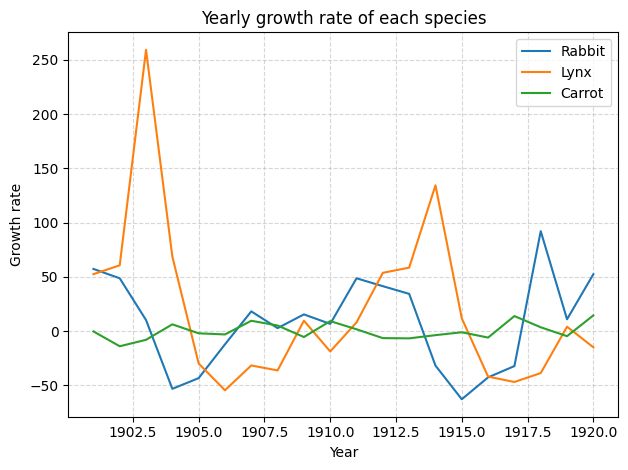

In [33]:
# 10. 5번의 각 개체의 년도별 증감율을 시각화하는 line plot을 그리시오.
growth_rate.plot(title="Yearly growth rate of each species")
plt.xlabel("Year")
plt.ylabel("Growth rate")
plt.legend(["Rabbit", "Lynx", "Carrot"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

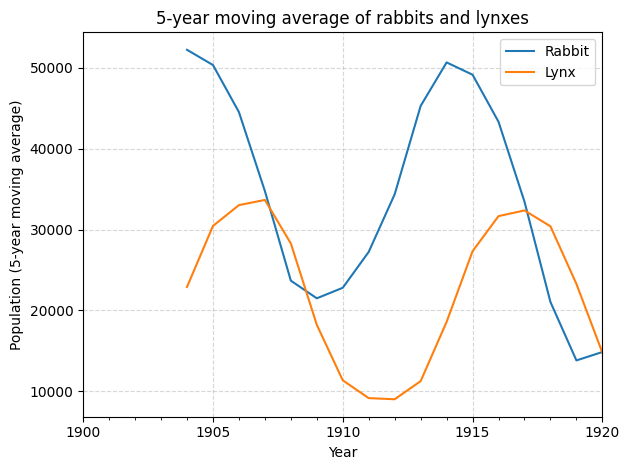

In [37]:
# 11. 토끼와 시라소니의 5년 이동평균을 계산하여, 이를 시각화하는 line plot을 그리시오.
rolling_5yr = pops_df[["토끼", "시라소니"]].rolling(window=5).mean()
rolling_5yr.plot(title="5-year moving average of rabbits and lynxes")
plt.xlabel("Year")
plt.ylabel("Population (5-year moving average)")
plt.legend(["Rabbit", "Lynx"])
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()